# Unsupervised Machine Learning

## This script contains the following points:

### 1. Import Libraries

### 2. Import Data

### 3. Data Cleaning

### 4. Data Prep for k-Means Clustering Analysis

### 5. Elbow Technique

### 6. k-Means Clustering

### 7. Merge Data

### 8. Export Data

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [2]:
# Display graphs in notebook
%matplotlib inline

### 2. Import Data

In [3]:
# Creating path string to data folder
path = r'C:\Users\bexlu\Desktop\Career Foundry\Data Immersion\Achievement 6\Project Folder'

In [4]:
# Importing csv file using os library
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'socio_economic_csv.csv'), index_col = False)

### 3. Data Cleaning

In [5]:
df.columns

Index(['STATE_NAME', 'YEAR', 'GINI_INDEX', 'POVERTY_RATE',
       'MEDIAN_HOUSEHOLD_INCOME', 'EMPLOYMENT_RATE', 'POPULATION_>16',
       'POPULATION<HIGH_SCHOOL_GRADUATE', 'TOTAL_CRIME'],
      dtype='object')

In [6]:
df.head(10)

,STATE_NAME,YEAR,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME
0,Alabama,2019,0.4741,0.154,51734,54.7,3937453,294290,5.0
1,Alaska,2019,0.4376,0.107,75463,59.3,569699,24260,15.0
2,Arizona,2019,0.4591,0.134,62055,56.8,5820607,460254,209.0
3,Arkansas,2019,0.4750,0.165,48952,55.2,2401299,167437,34.0
4,California,2019,0.4866,0.118,80440,60.3,31617786,3197226,1020.0
5,Colorado,2019,0.4548,0.094,77127,65.3,4645780,232972,217.0
6,Connecticut,2019,0.5024,0.102,78833,62.3,2926854,148752,86.0
7,Delaware,2019,0.4509,0.109,70176,58.8,792119,47029,22.0
8,District of Columbia,2019,0.5115,0.143,92266,66.0,587819,28942,222.0
9,Florida,2019,0.4808,0.127,59227,56.2,17719854,1165234,114.0


In [7]:
df.tail(10)

,STATE_NAME,YEAR,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME
406,Tennessee,2012,0.4732,0.180,42764,55.0,5131838,410101,321.0
407,Texas,2012,0.4767,0.179,50740,59.2,19828118,2355550,175.0
408,Utah,2012,0.4244,0.123,57049,63.9,2054876,120255,102.0
409,Vermont,2012,0.4392,0.114,52977,62.9,518107,21496,14.0
410,Virginia,2012,0.4661,0.119,61741,60.2,6541339,435810,138.0
411,Washington,2012,0.4498,0.136,57573,58.4,5486401,336326,274.0
412,West Virginia,2012,0.4638,0.173,40196,49.7,1513215,119468,27.0
413,Wisconsin,2012,0.4401,0.129,51059,62.3,4562954,222978,70.0
414,Wyoming,2012,0.4166,0.126,54901,63.6,453994,21047,2.0
415,Puerto Rico,2012,0.5325,0.448,19429,37.4,2924775,360911,NaN


In [8]:
df.shape

(416, 9)

#### Missing Values

In [9]:
# Check for missing values
df.isnull().sum()

STATE_NAME                          0
YEAR                                0
GINI_INDEX                          0
POVERTY_RATE                        0
MEDIAN_HOUSEHOLD_INCOME             0
EMPLOYMENT_RATE                     0
POPULATION_>16                      0
POPULATION<HIGH_SCHOOL_GRADUATE     0
TOTAL_CRIME                        17
dtype: int64

In [10]:
# Create new subset with missing values from product_name
df_nan = df[df['TOTAL_CRIME'].isnull() == True]

In [11]:
# Visualise subset
df_nan

,STATE_NAME,YEAR,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME
39,Puerto Rico,2019,0.5509,0.435,20474,38.7,2699404,212499,NaN
91,Puerto Rico,2018,0.5424,0.432,20296,37.4,2684285,232885,NaN
103,Wyoming,2018,0.4555,0.111,61584,62.5,460122,17210,NaN
115,Hawaii,2017,0.4455,0.106,77765,59.0,1153457,44953,NaN
143,Puerto Rico,2017,0.5512,0.445,19343,36.2,2771523,258786,NaN
167,Hawaii,2016,0.4420,0.090,74511,59.6,1152321,43987,NaN
195,Puerto Rico,2016,0.5419,0.441,20078,37.5,2809340,276365,NaN
219,Hawaii,2015,0.4346,0.098,73486,58.6,1152884,51027,NaN
232,Mississippi,2015,0.4759,0.196,40593,51.4,2345713,220011,NaN
259,Puerto Rico,2015,0.5589,0.435,18626,36.2,2833603,303266,NaN


In [12]:
# Create new df excluding missing values from the 'TOTAL_CRIME' column
df_clean = df[df['TOTAL_CRIME'].isnull() == False]

In [13]:
# Check shape of df_clean to compare shape to df
df_clean.shape

(399, 9)

In [14]:
# Correct number of observations removed

#### Duplicate Data

In [15]:
# Search for duplicated rows in df_clean and create a subset that contains only these rows
df_dups = df_clean.duplicated()

In [16]:
# Check df_dups subset that contains duplicated rows
df_dups.shape

(399,)

In [17]:
# No duplicate data

#### Mixed-Data Type

In [18]:
# Check df for mixed type columns
for col in df_clean.columns.tolist():
  weird = (df_clean[[col]].applymap(type) != df_clean[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_clean[weird]) > 0:
    print (col)

In [19]:
# No mixed Data found

### 4. Data Prep for k-Means Clustering Analysis

In [20]:
# Drop columns containing categorical data - 'STATE_NAME' and 'YEAR'
df_drop = df_clean.drop(columns = ['STATE_NAME','YEAR'])

In [21]:
df_drop.head()

,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME
0,0.4741,0.154,51734,54.7,3937453,294290,5.0
1,0.4376,0.107,75463,59.3,569699,24260,15.0
2,0.4591,0.134,62055,56.8,5820607,460254,209.0
3,0.4750,0.165,48952,55.2,2401299,167437,34.0
4,0.4866,0.118,80440,60.3,31617786,3197226,1020.0


In [22]:
# Standardise data to account for variance in data
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_drop)

### 5. Elbow Technique

In [23]:
# Define range of potential clusters in data, then define k-mean cluster in assigned range
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [24]:
# Create score represeting rate of variation for given cluster option
score = [kmeans[i].fit(df_drop).score(df_drop) for i in range(len(kmeans))]
score

[-1.307587573157585e+16,
 -3958210906074768.0,
 -2012007069809608.2,
 -977694414035127.4,
 -441143149481090.9,
 -312934649797304.06,
 -192090296827731.94,
 -113777669146646.69,
 -77407776045539.58]

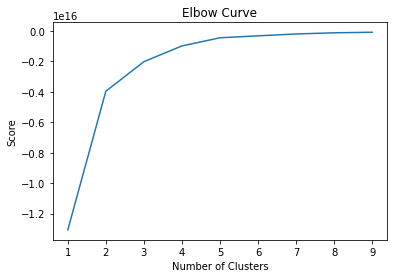

In [25]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Whilst the curve begins flattening at 3 clusters it truly plateaus at 4 clusters. I will start by seeing how many values are assigned to each cluster if I choose a value of 4. If there are not a significant number of values in the 4th cluster, which I suspect there will not be, I will cluster the data in 3.

### 6. k-Means Clustering

In [26]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [27]:
# Fit the k-means object to the data.
kmeans.fit(df_drop)

C:\Users\bexlu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [28]:
df_drop['clusters'] = kmeans.fit_predict(df_drop)

C:\Users\bexlu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [29]:
df_drop.head()

,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME,clusters
0,0.4741,0.154,51734,54.7,3937453,294290,5.0,0
1,0.4376,0.107,75463,59.3,569699,24260,15.0,0
2,0.4591,0.134,62055,56.8,5820607,460254,209.0,2
3,0.4750,0.165,48952,55.2,2401299,167437,34.0,0
4,0.4866,0.118,80440,60.3,31617786,3197226,1020.0,3


In [30]:
df_drop['clusters'].value_counts()

0    228
2    139
1     24
3      8
Name: clusters, dtype: int64

In [31]:
# Create the k-means object changing number of clusters as cluster with 8 data points is too small
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [32]:
# Fit the k-means object to the data.
kmeans.fit(df_drop)

C:\Users\bexlu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [33]:
df_drop['clusters'] = kmeans.fit_predict(df_drop)

C:\Users\bexlu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [34]:
df_drop.head()

,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME,clusters
0,0.4741,0.154,51734,54.7,3937453,294290,5.0,2
1,0.4376,0.107,75463,59.3,569699,24260,15.0,2
2,0.4591,0.134,62055,56.8,5820607,460254,209.0,0
3,0.4750,0.165,48952,55.2,2401299,167437,34.0,2
4,0.4866,0.118,80440,60.3,31617786,3197226,1020.0,1


In [35]:
df_drop['clusters'].value_counts()

2    228
0    139
1     32
Name: clusters, dtype: int64

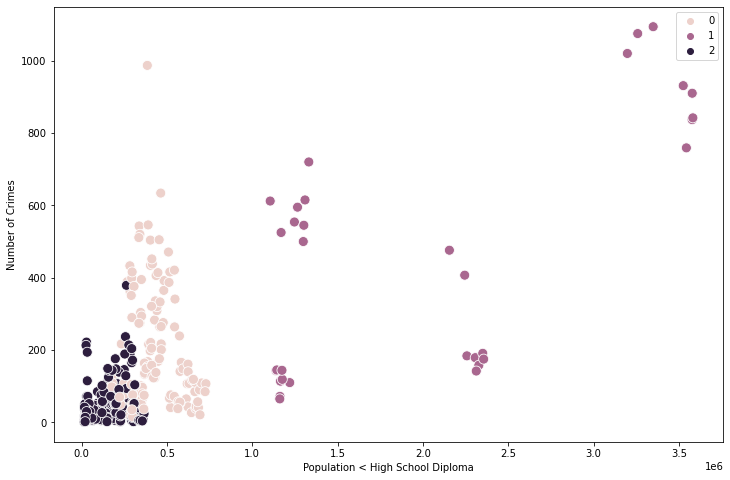

In [36]:
# Plot the clusters for the "POPULATION<HIGH_SCHOOL_GRADUATE" and "TOTAL_CRIME" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'], y=df_drop['TOTAL_CRIME'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Population < High School Diploma')
plt.ylabel('Number of Crimes')
plt.show()

The dark purple cluster shows us that nearly all of the lowest crime numbers (below 200), are reported from places where the population of residents who have attained less than a high school diploma is low.
Almost all of the highest crime numbers (above 600), are reported from places where the population of residents who have attained less than a high school diploma is high.
We could hypothesise that the higher the level of education of a population, the lower the number of hate crimes reported.

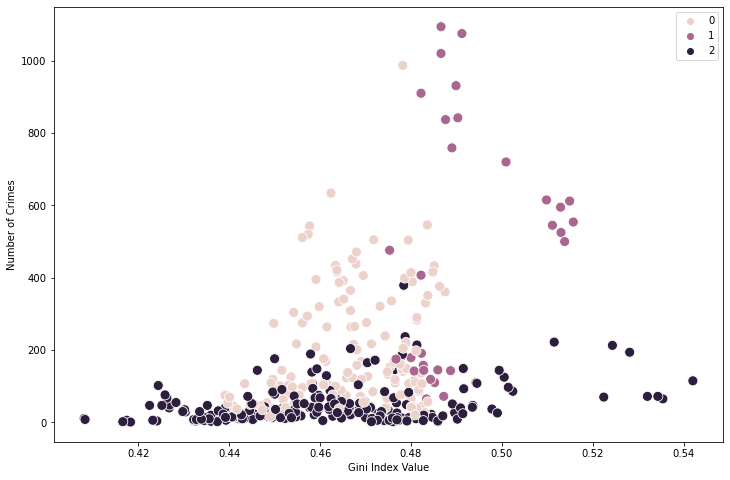

In [37]:
# Plot the clusters for the "GINI_INDEX" and "TOTAL_CRIME" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_drop['GINI_INDEX'], y=df_drop['TOTAL_CRIME'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Gini Index Value')
plt.ylabel('Number of Crimes')
plt.show()

Whilst we cannot see a linear relationship here the purple cluster is intersting. The lack of variance in this cluster shows that most of the highest number of crimes (above 650) occur in places that have a Gini Index value of 0.48 and above. This indicates that the highest number of crimes are not reported by locations where the income inequality is lower.

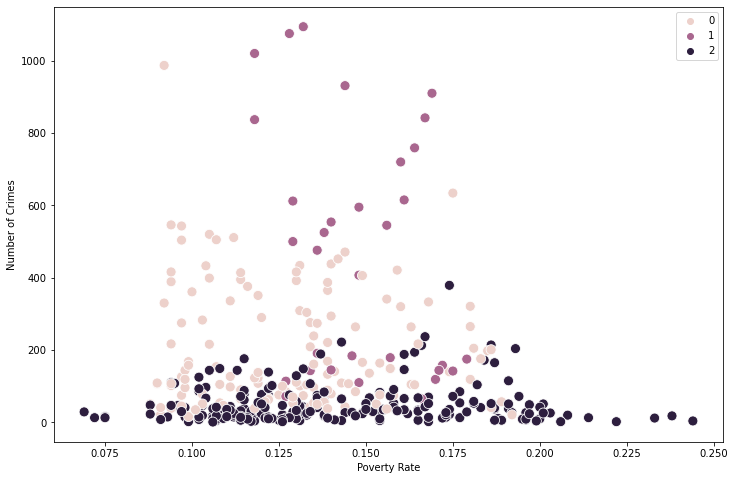

In [38]:
# Plot the clusters for the "POVERTY_RATE" and "TOTAL_CRIME" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_drop['POVERTY_RATE'], y=df_drop['TOTAL_CRIME'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Poverty Rate')
plt.ylabel('Number of Crimes')
plt.show()

From the above we can see that the highest number of crimes are not reported by locations where the poverty rate is highest, none of the highest crime numbers are reported by any location with a poverty rate higher than 17%. It is interesting that there seems to be more of a relationship between crime and income inequality than crime and poverty.

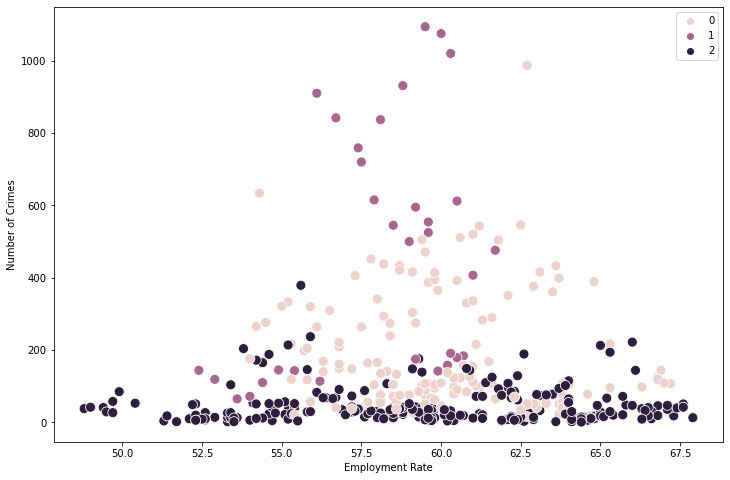

In [39]:
# Plot the clusters for the "EMPLOYMENT_RATE" and "TOTAL_CRIME" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_drop['EMPLOYMENT_RATE'], y=df_drop['TOTAL_CRIME'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Employment Rate')
plt.ylabel('Number of Crimes')
plt.show()

Interestingly the highest number of crimes are not reported from locations where the employment rate is lowest. However we can see that all of the highest number of crimes are reported from locations where the employment rate is below 63%.

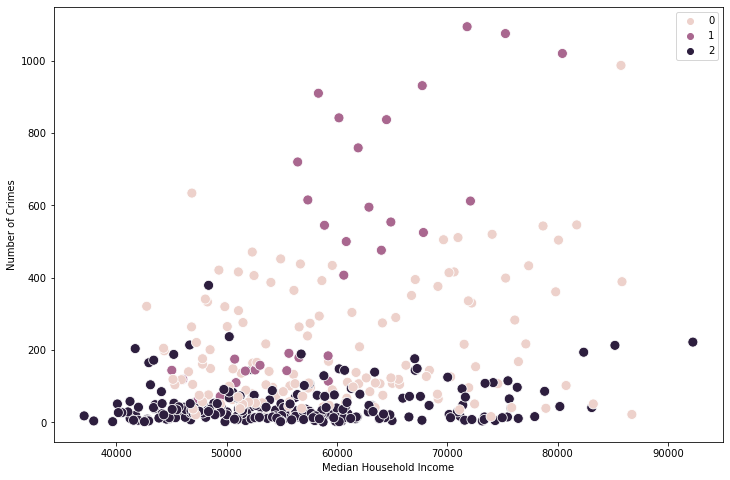

In [40]:
# Plot the clusters for the "MEDIAN_HOUSEHOLD_INCOME" and "TOTAL_CRIME" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_drop['MEDIAN_HOUSEHOLD_INCOME'], y=df_drop['TOTAL_CRIME'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Median Household Income')
plt.ylabel('Number of Crimes')
plt.show()

Again, interestingly the highest number of crimes are not reported by locations where median household income is lowest.

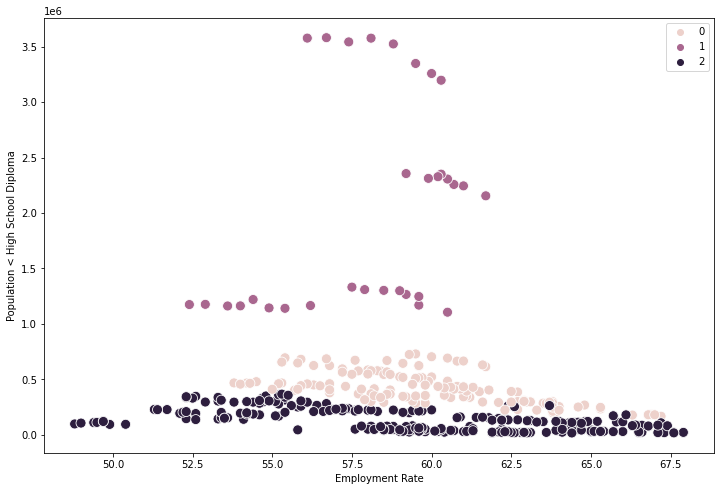

In [41]:
# Plot the clusters for the "EMPLOYMENT_RATE" and "POPULATION<HIGH_SCHOOL_GRADUATE" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_drop['EMPLOYMENT_RATE'], y=df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Employment Rate')
plt.ylabel('Population < High School Diploma')
plt.show()

The purple cluster is useful here as it shows that in places where the population of residents who have attained less than a high school diploma is high, the employment rate is never higher than 62%.

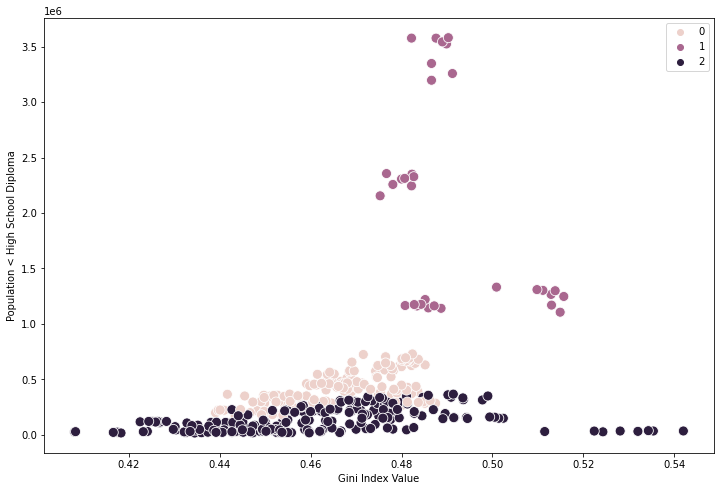

In [42]:
# Plot the clusters for the "GINI_INDEX" and "POPULATION<HIGH_SCHOOL_GRADUATE" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_drop['GINI_INDEX'], y=df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Gini Index Value')
plt.ylabel('Population < High School Diploma')
plt.show()

Again, the purple cluster is of note as it shows that places where the population of residents who have attained less than a high school diploma is high all have a Gini Index Value of above 0.47. This suggest a high level of income inequality. 

In [43]:
# Create cluster flag
df_drop.loc[df_drop['clusters'] == 2, 'cluster'] = 'dark purple'
df_drop.loc[df_drop['clusters'] == 1, 'cluster'] = 'purple'
df_drop.loc[df_drop['clusters'] == 0, 'cluster'] = 'pink'

In [44]:
# Compare descriptive statistics of cluster groups
df_drop.groupby('cluster').agg({'GINI_INDEX':['mean', 'median'], 
                         'POVERTY_RATE':['mean', 'median'], 
                         'MEDIAN_HOUSEHOLD_INCOME':['mean', 'median'],
                         'EMPLOYMENT_RATE':['mean', 'median'], 
                         'POPULATION_>16':['mean', 'median'], 
                         'POPULATION<HIGH_SCHOOL_GRADUATE':['mean', 'median'], 
                         'TOTAL_CRIME':['mean', 'median']})

GINI_INDEX         POVERTY_RATE        MEDIAN_HOUSEHOLD_INCOME  \
                  mean  median         mean median                    mean   
cluster                                                                      
dark purple   0.460867  0.4588     0.139895  0.131            55824.934211   
pink          0.466259  0.4668     0.129568  0.130            60009.158273   
purple        0.490994  0.4866     0.147906  0.147            59349.562500   

                     EMPLOYMENT_RATE        POPULATION_>16            \
              median            mean median           mean    median   
cluster                                                                
dark purple  54510.5       59.617544   59.7   1.922095e+06   1635871   
pink         57444.0       60.017266   59.8   6.661002e+06   5741873   
purple       59042.0       58.000000   58.9   2.122470e+07  18773986   

            POPULATION<HIGH_SCHOOL_GRADUATE          TOTAL_CRIME         
                                       mean   median        mean median  
cluster                                                                  
dark purple                    1.298393e+05   110797   46.850877   31.0  
pink                           4.143595e+05   403152  195.712230  127.0  
purple                         2.040139e+06  1743051  467.437500  488.0

The purple cluster has the worst stats accross all categories, with the exception of median household income.
It has the largest income inequality, the highest poverty rate, the lowest employment rate, highest population, the highest population that didn't attain a high school diploma and by far the highest number of crimes.

Interestingly the dark purple cluster has the lowest median household income and the lowest number of crimes. We can also see that this cluster has by far the lowest population. Perhaps this low median income and low population suggests that these crimes are coming from states that don't have as many densely populated or urban areas. Cities tend to mean higher incomes and higher population numbers so it would be interesting to take a look at the data in terms of an urban/rural divide to see what the relationship to crime is.

The relationship that seems to warrant further investigation is that between education and crime. In the dark purple cluster, where crimes are lowest, 6.7% of the population did not attain a high school diploma. In the pink cluster, where crimes are at a medium level, 7% of the population did not attain a high school diploma. In the purple cluster, where crimes are highest, 9% of the population did not attain a high school diploma.

This not only suggests a way to categorise the data moving forward but also presents an interesting line of enquiry. I could perhaps look to bring in more data regarding higher levels of education. Can we see that higher percentages of populations that attain a college degree report lower levels of hate crimes?

#### 7. Merge Data

In [48]:
df_drop.head(5)

,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME,clusters,cluster
0,0.4741,0.154,51734,54.7,3937453,294290,5.0,2,dark purple
1,0.4376,0.107,75463,59.3,569699,24260,15.0,2,dark purple
2,0.4591,0.134,62055,56.8,5820607,460254,209.0,0,pink
3,0.4750,0.165,48952,55.2,2401299,167437,34.0,2,dark purple
4,0.4866,0.118,80440,60.3,31617786,3197226,1020.0,1,purple


In [66]:
# Create new dataframe to merge with df_clean for cluster visualisation in tableau
df_cluster = df_drop[['clusters','cluster','GINI_INDEX','TOTAL_CRIME']]

In [67]:
df_cluster.head(5)

,clusters,cluster,GINI_INDEX,TOTAL_CRIME
0,2,dark purple,0.4741,5.0
1,2,dark purple,0.4376,15.0
2,0,pink,0.4591,209.0
3,2,dark purple,0.4750,34.0
4,1,purple,0.4866,1020.0


In [68]:
df_cluster.shape

(399, 4)

In [69]:
df_clean.head(5)

,STATE_NAME,YEAR,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME
0,Alabama,2019,0.4741,0.154,51734,54.7,3937453,294290,5.0
1,Alaska,2019,0.4376,0.107,75463,59.3,569699,24260,15.0
2,Arizona,2019,0.4591,0.134,62055,56.8,5820607,460254,209.0
3,Arkansas,2019,0.4750,0.165,48952,55.2,2401299,167437,34.0
4,California,2019,0.4866,0.118,80440,60.3,31617786,3197226,1020.0


In [70]:
df_clean.shape

(399, 9)

In [71]:
# Merge dataframe on 'GINIP_INDEX' and 'TOTAL_CRIME'
df_merge = df_clean.merge(df_cluster, on = ['GINI_INDEX','TOTAL_CRIME'],indicator = True)

In [72]:
df_merge.head(5)

,STATE_NAME,YEAR,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME,clusters,cluster,_merge
0,Alabama,2019,0.4741,0.154,51734,54.7,3937453,294290,5.0,2,dark purple,both
1,Alaska,2019,0.4376,0.107,75463,59.3,569699,24260,15.0,2,dark purple,both
2,Arizona,2019,0.4591,0.134,62055,56.8,5820607,460254,209.0,0,pink,both
3,Arkansas,2019,0.4750,0.165,48952,55.2,2401299,167437,34.0,2,dark purple,both
4,California,2019,0.4866,0.118,80440,60.3,31617786,3197226,1020.0,1,purple,both


In [73]:
df_merge.shape

(399, 12)

In [74]:
# Frequency check merge count, expect full match
df_merge['_merge'].value_counts()

both          399
right_only      0
left_only       0
Name: _merge, dtype: int64

In [75]:
df_merge['clusters'].value_counts()

2    228
0    139
1     32
Name: clusters, dtype: int64

#### 8. Export Data

In [76]:
# Export df_drop and save to 'Prepared Data'
df_merge.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'tableau_visualisation.csv'))